In [13]:
from pyspark.sql import SparkSession

# Initialize Spark and correctly link the SQLite JDBC driver
spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", "data/sqlite-jdbc-3.49.1.0.jar") \
    .config("spark.driver.extraClassPath", "data/sqlite-jdbc-3.49.1.0.jar") \
    .getOrCreate()

print(spark)

In [14]:
!pip install pyspark

In [8]:
# Correctly set up to read from SQLite
df_sales = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:sqlite:data/dw/smart_sales.db") \
    .option("dbtable", "sales") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_sales.show()

+--------------+---------+--------+-----------+----------+--------+------------+-------------+--------------+----------+---------------+-----------+
|transaction_id|     date|store_id|customer_id|product_id|quantity|sales_amount|shipping_cost|promotion_code|campaignid|discountpercent|paymenttype|
+--------------+---------+--------+-----------+----------+--------+------------+-------------+--------------+----------+---------------+-----------+
|           550| 1/6/2024|     404|       1008|       102|    NULL|        39.1|         NULL|          NULL|         0|            5.0|     Credit|
|           551| 1/6/2024|     403|       1009|       105|    NULL|       19.78|         NULL|          NULL|         0|           10.0|       Cash|
|           552|1/16/2024|     404|       1004|       107|    NULL|       335.1|         NULL|          NULL|         0|            5.0|     Credit|
|           553|1/16/2024|     406|       1006|       102|    NULL|       195.5|         NULL|          NU

In [9]:
from pyspark.sql import SparkSession

# Initialize Spark and correctly link the SQLite JDBC driver
spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", "data/sqlite-jdbc-3.49.1.0.jar") \
    .config("spark.driver.extraClassPath", "data/sqlite-jdbc-3.49.1.0.jar") \
    .getOrCreate()

print(spark)

# Set up to read from SQLite
df_sales = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:data/dw/smart_sales.db") \
    .option("dbtable", "sales") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_sales.show()

+--------------+---------+--------+-----------+----------+--------+------------+-------------+--------------+----------+---------------+-----------+
|transaction_id|     date|store_id|customer_id|product_id|quantity|sales_amount|shipping_cost|promotion_code|campaignid|discountpercent|paymenttype|
+--------------+---------+--------+-----------+----------+--------+------------+-------------+--------------+----------+---------------+-----------+
|           550| 1/6/2024|     404|       1008|       102|    NULL|        39.1|         NULL|          NULL|         0|            5.0|     Credit|
|           551| 1/6/2024|     403|       1009|       105|    NULL|       19.78|         NULL|          NULL|         0|           10.0|       Cash|
|           552|1/16/2024|     404|       1004|       107|    NULL|       335.1|         NULL|          NULL|         0|            5.0|     Credit|
|           553|1/16/2024|     406|       1006|       102|    NULL|       195.5|         NULL|          NU

In [10]:
df_sales.createOrReplaceTempView("sales")

query = """
SELECT customer_id, SUM(sales_amount) AS total_spent
FROM sales
GROUP BY customer_id
ORDER BY total_spent DESC
"""

top_customers = spark.sql(query)
top_customers.show()

+-----------+------------------+
|customer_id|       total_spent|
+-----------+------------------+
|       1001|23752.520000000004|
|       1010|          22822.54|
|       1007|           12422.6|
|       1004|11813.439999999999|
|       1006|          11715.82|
|       1011|           8750.94|
|       1002|           7434.44|
|       1005|3796.7799999999997|
|       1003|2427.2999999999997|
|       1009|           1806.34|
|       1008|           1545.54|
+-----------+------------------+



In [11]:
# Create a temporary view
df_sales.createOrReplaceTempView("sales")

# Query top customers
query = """
SELECT customer_id, SUM(sales_amount) AS total_spent
FROM sales
GROUP BY customer_id
ORDER BY total_spent DESC
"""

top_customers = spark.sql(query)
top_customers.show()

+-----------+------------------+
|customer_id|       total_spent|
+-----------+------------------+
|       1001|23752.520000000004|
|       1010|          22822.54|
|       1007|           12422.6|
|       1004|11813.439999999999|
|       1006|          11715.82|
|       1011|           8750.94|
|       1002|           7434.44|
|       1005|3796.7799999999997|
|       1003|2427.2999999999997|
|       1009|           1806.34|
|       1008|           1545.54|
+-----------+------------------+



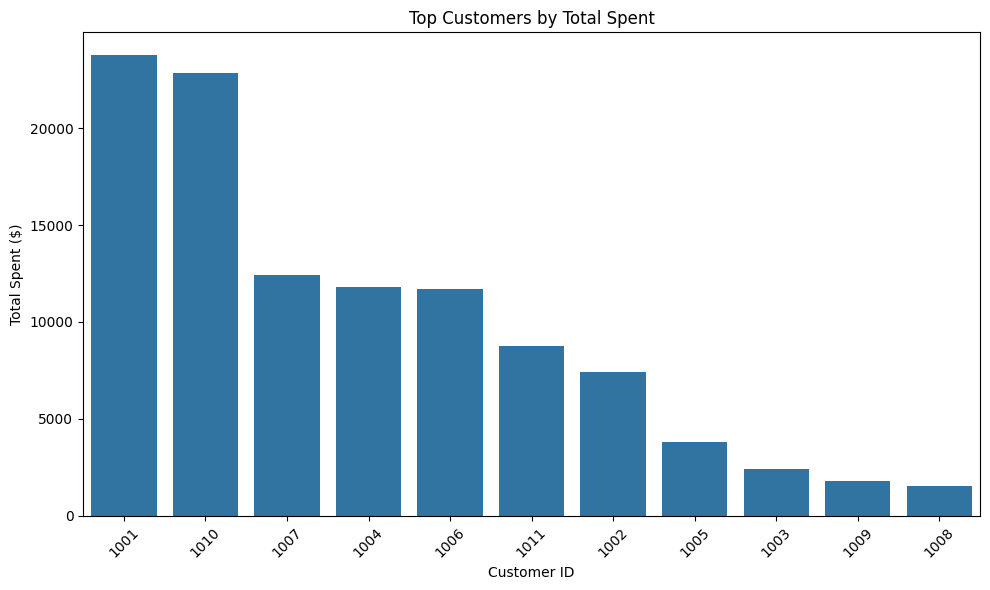

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to pandas
top_customers_pd = top_customers.toPandas()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers_pd, x="customer_id", y="total_spent")
plt.title("Top Customers by Total Spent")
plt.xticks(rotation=45)
plt.xlabel("Customer ID")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()

In [7]:
!pip3 install pandas matplotlib seaborn --break-system-packages

In [5]:
pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Load tables in Spark correctly
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", "data/sqlite-jdbc-3.49.1.0.jar") \
    .config("spark.driver.extraClassPath", "data/sqlite-jdbc-3.49.1.0.jar") \
    .getOrCreate()

# Load the sales table
df_sales = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:data/dw/smart_sales.db") \
    .option("dbtable", "sales") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_sales.createOrReplaceTempView("sales")
df_sales.show(5)

+--------------+---------+--------+-----------+----------+--------+------------+-------------+--------------+----------+---------------+-----------+
|transaction_id|     date|store_id|customer_id|product_id|quantity|sales_amount|shipping_cost|promotion_code|campaignid|discountpercent|paymenttype|
+--------------+---------+--------+-----------+----------+--------+------------+-------------+--------------+----------+---------------+-----------+
|           550| 1/6/2024|     404|       1008|       102|    NULL|        39.1|         NULL|          NULL|         0|            5.0|     Credit|
|           551| 1/6/2024|     403|       1009|       105|    NULL|       19.78|         NULL|          NULL|         0|           10.0|       Cash|
|           552|1/16/2024|     404|       1004|       107|    NULL|       335.1|         NULL|          NULL|         0|            5.0|     Credit|
|           553|1/16/2024|     406|       1006|       102|    NULL|       195.5|         NULL|          NU

In [17]:
!ls data/dw

smart_sales.db


In [ ]:
df_customer = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:data/dw/smart_sales.db") \
    .option("dbtable", "customer") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_customer.createOrReplaceTempView("customer")

In [19]:
df_sales.createOrReplaceTempView("sales")

query = """
SELECT customer_id, SUM(sales_amount) AS total_spent
FROM sales
GROUP BY customer_id
ORDER BY total_spent DESC
"""

df_top_customers = spark.sql(query)
df_top_customers.show()

+-----------+------------------+
|customer_id|       total_spent|
+-----------+------------------+
|       1001|23752.520000000004|
|       1010|          22822.54|
|       1007|           12422.6|
|       1004|11813.439999999999|
|       1006|          11715.82|
|       1011|           8750.94|
|       1002|           7434.44|
|       1005|3796.7799999999997|
|       1003|2427.2999999999997|
|       1009|           1806.34|
|       1008|           1545.54|
+-----------+------------------+



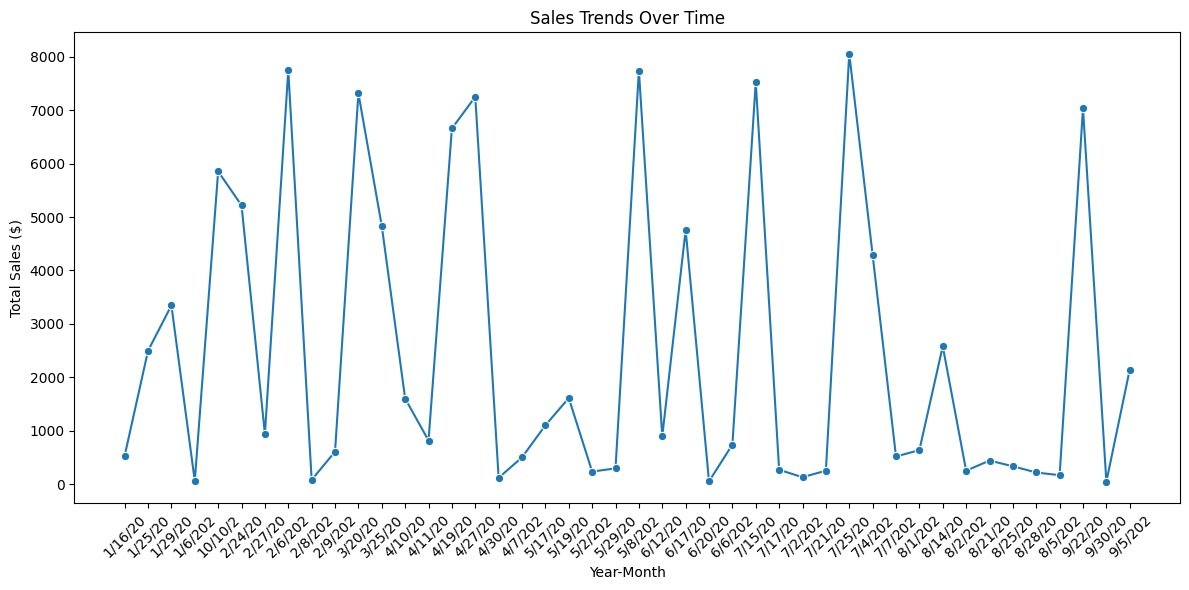

In [20]:
from pyspark.sql.functions import substring

# Add Year-Month column
df_sales = df_sales.withColumn("year_month", substring("date", 1, 7))
df_sales.createOrReplaceTempView("sales")

# Summarize sales by month
df_trends = spark.sql("""
SELECT year_month, SUM(sales_amount) AS total_sales
FROM sales
GROUP BY year_month
ORDER BY year_month
""")

# Convert to Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_trends_pd = df_trends.toPandas()

# Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(data=df_trends_pd, x="year_month", y="total_sales", marker='o')
plt.xticks(rotation=45)
plt.title("Sales Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart for Top Customers
sns.barplot(data=df_top_customers_pd, x="name", y="total_spent")
plt.xticks(rotation=45)
plt.title("Top Customers by Total Spent")
plt.show()

NameError: name 'df_top_customers_pd' is not defined